## Phase 3 (Data Preparation): Fare => LogFare, FareBinned

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 5](https://data-science.training/kapitel-5/)
* Datum: 23.03.2023

Das Attribut "Fare" enthält einen fehlenden Wert, den wir schätzen können. Die Verteilung ist stark rechtsschief. Es gibt Ausreißer im oberen Bereich (=> Luxuskabinen). Mit Hilfe der Logarithmus-Funktion lässt sich diese Rechtsschiefe reduzieren. Außerdem reisen manchmal mehrere Passagiere auf der gleichen Ticket-Nummer. Der Ticket-Preis bezieht sich auf diese Ticket-Nummer. Wir können den Ticket-Preis normieren, sodass er den Preis für einen Passagier angibt.

Mit Hilfe von Seaborn erstellen wir Histogramme zu den Features.

In [5]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# NumPy Paket (Package) importieren
#  Mehrdimensionale Datenstrukturen (Vektoren, Matrizen, Tensoren, Arrays), Lineare Algebra
#  https://numpy.org/doc/
import numpy as np
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt
# Seaborn importieren [sns = seaborn name space, Samuel Norman Seaborn]
#  High-end Daten-Visualisierungen auf Basis von Matplot
#  https://seaborn.pydata.org/
import seaborn as sns
# Deutsches Zahlenformat
import locale
locale.setlocale(locale.LC_ALL, 'de')
# Warnungen unterdrücken
#import warnings
#warnings.filterwarnings('ignore')

'de'

In [6]:
# Trainings- und Testdaten als Pandas Data Frame (df) aus CSV-Dateien laden
#  (KNIME: "CSV Reader")
df_train = pd.read_csv('../../data/titanic/original/train.csv')
df_test  = pd.read_csv('../../data/titanic/original/test.csv')

In [7]:
# Trainings- und Testdaten zusammenführen
#  (KNIME "Concatenate")
df = pd.concat([df_train, df_test], ignore_index=True)

In [8]:
# Datentypen automatisch konvertieren
df = df.convert_dtypes()

In [9]:
# Fehlende Werte behandeln (d.h. schätzen)
#  (KNIME: "Missing Values")
# Fare (Kardinalskala): 1 fehlender Wert => Benutze den konstanten Wert 7,896
#df['Fare'] = df['Fare'].fillna(7.896)
display(df[df['Fare'].isna()])
df.loc[1043, 'Fare'] = 7.896
display(df[df['PassengerId'] == 1044])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,<NA>,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,<NA>,<NA>,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,<NA>,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.896,<NA>,S


In [10]:
# Hilfsgröße TicketCount
#  (KNIME: "GroupBy", "Joiner", "Column Rename")
ticketCount = df.groupby('Ticket', as_index=False)['PassengerId'].count()
ticketCount = ticketCount.rename(columns={'PassengerId': 'TicketCount'})
#display(ticketCount)
df = df.merge(ticketCount, how='left', on='Ticket')
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,<NA>,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,<NA>,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,<NA>,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,<NA>,3,"Spector, Mr. Woolf",male,<NA>,0,0,A.5. 3236,8.05,<NA>,S,1
1305,1306,<NA>,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,3
1306,1307,<NA>,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,<NA>,S,1
1307,1308,<NA>,3,"Ware, Mr. Frederick",male,<NA>,0,0,359309,8.05,<NA>,S,1


In [11]:
# Feature "Fare"
df['Fare'] = df['Fare'].astype(float)

In [12]:
# Neues Feature "LogFare"
#  (KNIME: "Math Formula")
df['LogFare'] = np.log( 1.0 + df['Fare'] ).astype(float)

In [13]:
# Neues Feature "HyperboleFare"
#  (KNIME: "Math Formula")
df['HyperboleFare'] = ( 1.0 / ( 1.0 + df['Fare'] ) ).astype(float)

In [14]:
# Neues Feature "SqrtFare"
#  (KNIME: "Math Formula")
df['SqrtFare'] = pow(df['Fare'], 0.5).astype(float)

In [15]:
# Neues Feature "LogFareTC"
#  (KNIME: "Math Formula")
df['LogFareTC'] = np.log( 1.0 + df['Fare'] / df['TicketCount'] ).astype(float)

In [16]:
# Seaborn: Allgemeine Einstellungen

# Schriftart setzen
sns.set(font = 'Arial')
# Schriftgröße setzen
sns.set(font_scale = 2.5)
# Achsen im deutschen Zahlenformat
plt.rcParams['axes.formatter.use_locale'] = True
# Bildgröße setzen (16 x 9)
sns.set(rc={'figure.figsize':(8, 4.5)})
# Weißes Gitter setzen
sns.set_style('whitegrid')

In [17]:
# Histogramm erstellen
#  (KNIME: "Histogram")
# Attribut Fare mit 50 Klassen (Bins)
#plt.hist(df['Fare'], bins=50)
# Überschrift und Achsenbeschriftungen
#plt.title('Histogramm')
#plt.xlabel('Fare')
#plt.ylabel('Häufigkeit')
# Grafik ausgeben
#plt.show()

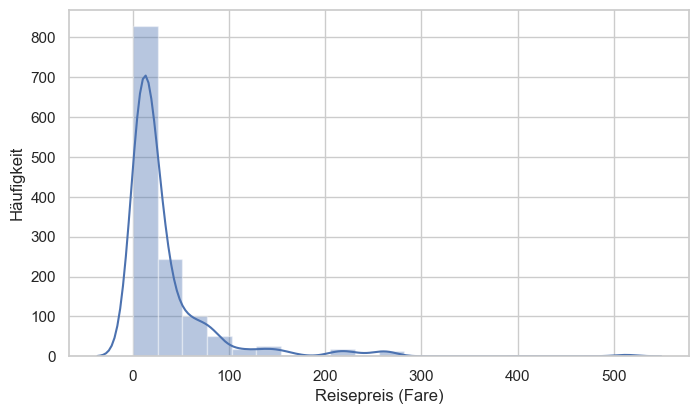

In [18]:
# Histplot zu Fare
# stat = density, count, percent
sns.histplot(df['Fare'], kde=True, stat='count', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), bins=20)

# Achsen beschriften
plt.xlabel('Reisepreis (Fare)')
plt.ylabel('Häufigkeit')

# Grafik speichern
plt.savefig('../../figures/svg/Hist_Fare_0.svg', format='svg', dpi=1200, transparent=True)

In [19]:
# Histogramm erstellen
#  (KNIME: "Histogram")
# Attribut LogFare mit 50 Klassen (Bins)
#plt.hist(df['LogFare'], bins=50)
# Überschrift und Achsenbeschriftungen
#plt.title('Histogramm')
#plt.xlabel('LogFare')
#plt.ylabel('Häufigkeit')
# Grafik ausgeben
#plt.show()

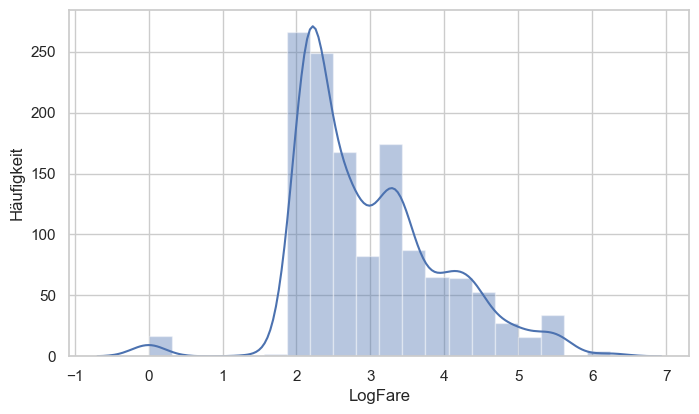

In [20]:
# Histplot zu LogFare
# stat = density, count, percent
sns.histplot(df['LogFare'], kde=True, stat='count', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), bins=20)

# Achsen beschriften
plt.xlabel('LogFare')
plt.ylabel('Häufigkeit')

# Grafik speichern
plt.savefig('../../figures/svg/Hist_LogFare.svg', format='svg', dpi=1200, transparent=True)

In [21]:
# Histogramm erstellen
#  (KNIME: "Histogram")
# Attribut HyperboleFare mit 50 Klassen (Bins)
#plt.hist(df['HyperboleFare'], bins=50)
# Überschrift und Achsenbeschriftungen
#plt.title('Histogramm')
#plt.xlabel('HyperboleFare')
#plt.ylabel('Häufigkeit')
# Grafik ausgeben
#plt.show()

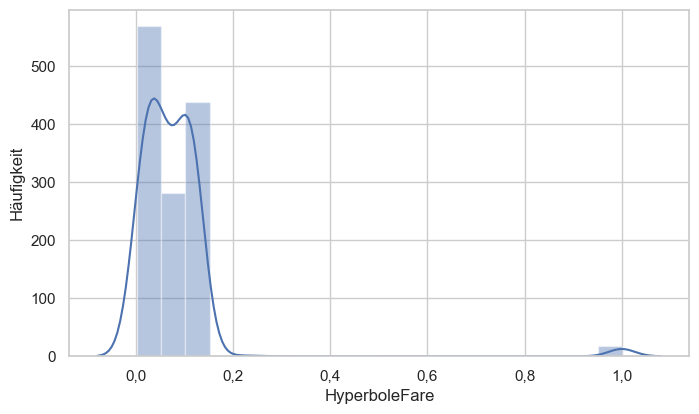

In [22]:
# Histplot zu HyperboleFare
# stat = density, count, percent
sns.histplot(df['HyperboleFare'], kde=True, stat='count', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), bins=20)

# Achsen beschriften
plt.xlabel('HyperboleFare')
plt.ylabel('Häufigkeit')

# Grafik speichern
plt.savefig('../../figures/svg/Hist_HyperboleFare.svg', format='svg', dpi=1200, transparent=True)

In [23]:
# Histogramm erstellen
#  (KNIME: "Histogram")
# Attribut SqrtFare mit 50 Klassen (Bins)
#plt.hist(df['SqrtFare'], bins=50)
# Überschrift und Achsenbeschriftungen
#plt.title('Histogramm')
#plt.xlabel('SqrtFare')
#plt.ylabel('Häufigkeit')
# Grafik ausgeben
#plt.show()

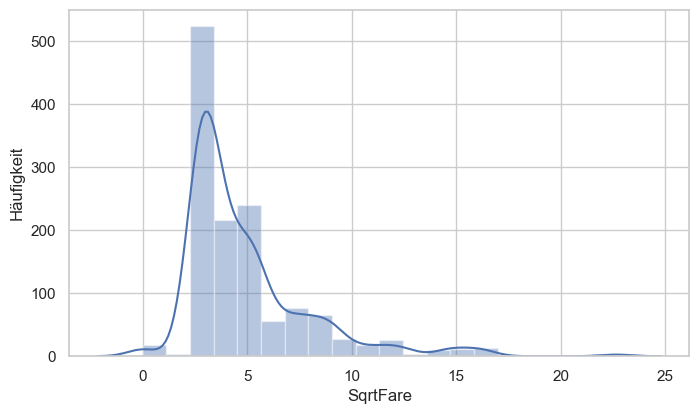

In [24]:
# Histplot zu SqrtFare
# stat = density, count, percent
sns.histplot(df['SqrtFare'], kde=True, stat='count', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), bins=20)

# Achsen beschriften
plt.xlabel('SqrtFare')
plt.ylabel('Häufigkeit')

# Grafik speichern
plt.savefig('../../figures/svg/Hist_SqrtFare.svg', format='svg', dpi=1200, transparent=True)

In [25]:
# Histogramm erstellen
#  (KNIME: "Histogram")
# Attribut LogFareTC mit 50 Klassen (Bins)
#plt.hist(df['LogFareTC'], bins=50)
# Überschrift und Achsenbeschriftungen
#plt.title('Histogramm')
#plt.xlabel('LogFareTC')
#plt.ylabel('Häufigkeit')
# Grafik ausgeben
#plt.show()

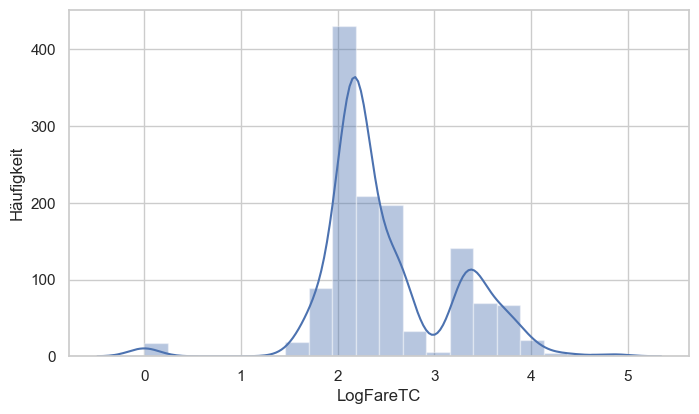

In [26]:
# Histplot zu LogFareTC
# stat = density, count, percent
sns.histplot(df['LogFareTC'], kde=True, stat='count', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), bins=20)

# Achsen beschriften
plt.xlabel('LogFareTC')
plt.ylabel('Häufigkeit')

# Grafik speichern
plt.savefig('../../figures/svg/Hist_LogFareTC.svg', format='svg', dpi=1200, transparent=True)

In [27]:
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketCount,LogFare,HyperboleFare,SqrtFare,LogFareTC
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S,1,2.110213,0.121212,2.692582,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,4.280593,0.013834,8.442944,3.601186
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S,1,2.188856,0.112045,2.815138,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,3.990834,0.018484,7.286975,3.316003
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S,1,2.202765,0.110497,2.837252,2.202765


In [28]:
# Korrelationsmatrix mit den linearen Korrelationskoeffizienten nach Pearson
#  (KNIME: "Linear Correlation")
def dst_correlation_matrix(df):
    # Nur numerische Attribute auswählen
    df1 = df.select_dtypes(include=[np.number])
    # Korrelationsmatrix berechnen
    corr_matrix = df1.corr(method='pearson')
    # Rückgabe
    return corr_matrix

In [29]:
# (Starke) Korrelationskoeffizienten berechnen
#  (KNIME: "Linear Correlation", "Correlation Filter")
def dst_correlation_measures_filtered(corr_matrix, treshold=0.75):
    # Absolute Werte
    corr_matrix = corr_matrix.abs()
    # Diagonale löschen (Nullwerte)
    corr_matrix[corr_matrix == 1] = 0
    # Dreispaltige Tabelle erstellen: Attribut 1, Attribut 2, Koeffizient
    corr_measures = corr_matrix.unstack()
    # Duplikate entfernen
    corr_measures = corr_measures.drop_duplicates()
    # Filer anwenden
    corr_measures = corr_measures[corr_measures > treshold]
    # Absteigende Sortierung
    corr_measures = corr_measures.sort_values(ascending=False)
    # Kleine Matrix erstellen
    #corr_measures = corr_measures.unstack()
    # Rückgabe
    return corr_measures

In [30]:
# Korrelationsanalyse
corr_matrix = dst_correlation_matrix(df)
display(corr_matrix)
corr_measures = dst_correlation_measures_filtered(corr_matrix)
display(corr_measures)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,TicketCount,LogFare,HyperboleFare,SqrtFare,LogFareTC
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031027,-0.010350,0.019060,-0.015864,0.025994,0.029938
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.064962,0.329862,-0.182865,0.312508,0.306219
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558742,-0.078554,-0.686140,0.206761,-0.671072,-0.798195
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.177280,-0.185284,0.192259,-0.043069,0.199273,0.411531
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160389,0.679444,0.311804,-0.181391,0.250740,-0.084967
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221668,0.647029,0.323684,-0.176115,0.286221,-0.085951
Fare,0.031027,0.257307,-0.558742,0.177280,0.160389,0.221668,1.000000,0.479058,0.805496,-0.288785,0.945659,0.649504
TicketCount,-0.010350,0.064962,-0.078554,-0.185284,0.679444,0.647029,0.479058,1.000000,0.579242,-0.212200,0.566339,0.002616
LogFare,0.019060,0.329862,-0.686140,0.192259,0.311804,0.323684,0.805496,0.579242,1.000000,-0.642502,0.949672,0.790688
HyperboleFare,-0.015864,-0.182865,0.206761,-0.043069,-0.181391,-0.176115,-0.288785,-0.212200,-0.642502,1.000000,-0.457097,-0.611544


LogFare   SqrtFare     0.949672
Fare      SqrtFare     0.945659
          LogFare      0.805496
Pclass    LogFareTC    0.798195
LogFare   LogFareTC    0.790688
SqrtFare  LogFareTC    0.751819
dtype: float64

### Zwischenergebnis

(1) Ausgangspunkt

Die Verteilung der Ticket-Preise ist sehr schief und zwar rechtsschief.

Außerdem ist der Gesamtpreis angegeben, nicht der Preis, den ein einzelner Passagier bezahlt hat.

(2) Neues Feature LogFare

Zunächst wird die Hilfsgröße TicketCount berechnet. Diese gibt an, wie viele Personen auf eine Ticket-Nummer mitgereist sind.

Der Einzelpreis ist dann:

Fare / TicketCount

Die Rechtsschiefe der Verteilung kann man mittels einer Logarithmus-Funktion etwas abmildern (transformieren):

LogFare = LN (1 + Fare / TicketCount)

Da es auch Ticket-Preise von 0 gibt, addieren wir die Zahl 1 hinzu, denn für den Wert 0 ist der Logarithmus nicht definiert und wird Minus-Unendlich.

(3) Korrelationsanalyse

Schließlich führen wir noch eine Korrelationsanalyse durch. Als Schwellwert stellen wir 0,75 im Correlation Filter ein. Damit werden Attribute herausgefiltert, die stark korreliert sind. Leider wird dadurch eben das neue Feature LogFare herausgefiltert.

Der Korrelationskoeffizient von Pclass und LogFare beträgt nämlich -0,798.

Entweder wir akzeptieren einen Schwellwert von 0,80 oder wir benutzen eine andere Idee (Binning, s.u.)


In [32]:
# Quartile berechnen und ausgeben
def dst_quartiles(arr):
    print('Q0 [  0%%]: %8.4f' % np.quantile(arr, 0.00)) 
    print('Q1 [ 25%%]: %8.4f' % np.quantile(arr, 0.25)) 
    print('Q2 [ 50%%]: %8.4f' % np.quantile(arr, 0.50)) 
    print('Q3 [ 75%%]: %8.4f' % np.quantile(arr, 0.75)) 
    print('Q4 [100%%]: %8.4f' % np.quantile(arr, 1.00))

In [33]:
# Spezielle Titanic-Statistik (Überlebenswahrscheinlichkeiten)
def dst_titanic_statistics(df, col):
    stats = df.groupby([col], as_index=False, observed=True)['PassengerId'].count() # Spalte "PassengerId" aus Titanic-Daten
    probs = df.groupby([col], as_index=False, observed=True)['Survived'].mean()     # Spalte "Survived"    aus Titanic-Daten
    stats = stats.merge(probs, on=col)
    stats = stats.rename(columns={'PassengerId': 'Anzahl', 'Survived': 'Überlebenswahrscheinlichkeit'})
    return stats

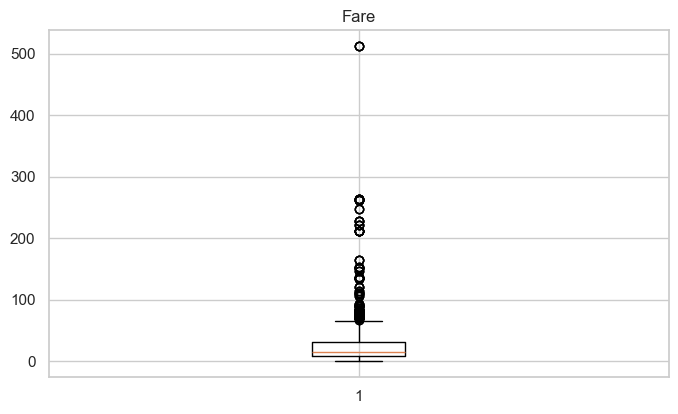

In [34]:
# Boxplot für das Attribut Fare
plt.subplot()
plt.title('Fare')
plt.boxplot(df['Fare'])
plt.show()

In [35]:
# Quartile berechnen und ausgeben
dst_quartiles(df['Fare'])

Q0 [  0%]:   0.0000
Q1 [ 25%]:   7.8958
Q2 [ 50%]:  14.4542
Q3 [ 75%]:  31.2750
Q4 [100%]: 512.3292


In [36]:
# Fare Binning - Teil 1: Automatisches Binning (mittels Quantile)
df['FareBinned'] = pd.qcut(df['Fare'].dropna(), 4)
# Statistik (Überlebenswahrscheinlichkeiten)
stats = dst_titanic_statistics(df, 'FareBinned')
display(stats)

,FareBinned,Anzahl,Überlebenswahrscheinlichkeit
0,"(-0.001, 7.896]",337,0.197309
1,"(7.896, 14.454]",321,0.303571
2,"(14.454, 31.275]",328,0.441048
3,"(31.275, 512.329]",323,0.6


In [37]:
# Fare Binning - Teil 2: Manuelles Binning
bins = [0, 8, 16, 32, 1024]
labels = ['Low', 'Medium', 'High','VeryHigh']
df['FareBinned'] = pd.cut(df['Fare'], bins, right=False, labels=labels)
# Statistik (Überlebenswahrscheinlichkeiten)
stats = dst_titanic_statistics(df, 'FareBinned')
display(stats)

,FareBinned,Anzahl,Überlebenswahrscheinlichkeit
0,Low,361,0.215768
1,Medium,354,0.308642
2,High,283,0.454082
3,VeryHigh,311,0.597156


#### Hinweis

Das Binning wird auf Basis der Trainings- und Testdaten durchgeführt. In den Analysen (mittels GroupBy) werden die Überlebenswahrscheinlichkeiten korrekt berechnet, denn in den Testdaten gilt Survived=NaN (Not-a-Number = Missing Value). Die Anzahl der Werte enthält jedoch auch die Testdaten.